# Euler's Method

Most differential equations cannot be solved analytically in terms of elementary functions. So what do we do? We can *always* approximate. Euler's method is the simplest numerical method for approximating solutions of differential equations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Derivation

Consider a first order differential equation with an initial condition:

$$
y' = f(t,y) \ , \ \ y(t_0)=y_0
$$

The idea behind Euler's method is:

1. Contruct the equation of the tangent line to the unknown function $y(t)$ at $t=t_0$:

    $$
    y = y(t_0) + f(t_0,y_0)(t - t_0)
    $$

    where $y'(t_0) = f(t_0,y_0)$ is the slope of $y(t)$ at $t=t_0$.

2. Use the tangent line to approximate $y(t)$ at a small time step $t_1 = t_0 + h$:

    $$
    y_1 = y_0 + f(t_0,y_0)(t_1 - t_0)
    $$
    
    where $y_1 \approx y(t_1)$.

3. Repeat! Construct the line at $(t_n,y_n)$ of slope $f(t_n,y_n)$ and compute $y_{n+1}$ at $t_{n+1} = t_n + h$.

The formula for Euler's method defines a recursive sequence:

$$
y_{n+1} = y_n + f(t_n,y_n)(t_{n+1} - t_n) \ , \ \ y_0 = y(t_0)
$$

where $y_n \approx y(t_n)$ for each $n$. If we choose equally spaced $t$ values then the formula becomes:

$$
y_{n+1} = y_n + f(t_n,y_n)h \ \ , \ \ y_0 = y(t_0) \ , \ \ t_n = t_0 + nh 
$$

with time step $h = t_{n+1} - t_n$. If we implement $N$ iterations of Euler's method from $t_0$ to $t_f$ then the time step is

$$
h = \frac{t_f - t_0}{N}
$$

Note two very important points about Euler's method and numerical methods in general:

* A smaller time step $h$ reduces the error in the approximation.
* A smaller time step $h$ requires more computations!

## Implementation

Let's apply Euler's method to the equation $y' = -y, y(0)=1$. We can solve the equation analytically to find $y(t) = e^{-t}$ and so we can compare the approximation to the exact solution.

The Python code below accomplishes the following tasks:

1. Define the right hand side of the equation $y' = f(t,y)$ as a Python function `f(t,y)`.
2. Define the initial value $t_0$ and final value $t_f$ and the number $N$ of iterations to compute.
3. Create a vector `t` of $N+1$ equally spaced values from $t_0$ to $t_f$
4. Define the initial value $y_0 = y(t_0)$, initialize a vector `y` of zeros of the same length as the vector `t`.
5. Initialize the first entry `y[0]` of vector `y` as the initial value $y_0$.
6. Compute each value $y_{n+1} = y_n + f(t_n,y_n) h$ for $n=0,\dots,N-1$ and update the entry `y[n+1]`.

In [3]:
f = lambda t,y: -y

t0 = 0; tf = 1; N = 5; h = (tf - t0)/N;
t = np.linspace(t0,tf,N+1)

y0 = 1
y = np.zeros(len(t))
y[0] = y0

for n in range(N):
    y[n+1] = y[n] + f(t[n],y[n])*h

Print the vector `t` to see that the first entry is $t_0$, the last value is $t_f$, all values are equally spaced by step size $h$ and that there are $N+1$ entries.

In [4]:
t

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

Print the vector `y` to see that the first entry is $y_0$ and that there are $N+1$ entries.

In [5]:
y

array([1.     , 0.8    , 0.64   , 0.512  , 0.4096 , 0.32768])

We know the exact solution is $y(t) = e^{-t}$. Let's plot the exact solution with the approximation.

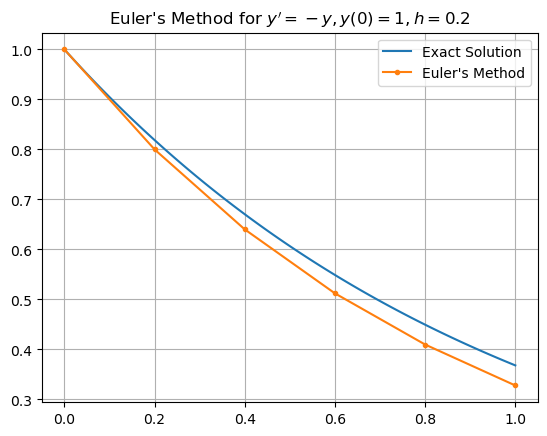

In [6]:
t_exact = np.linspace(0,1,100)
y_exact = np.exp(-t_exact)
plt.plot(t_exact,y_exact,label='Exact Solution')
plt.plot(t,y,'.-',label="Euler's Method")
plt.grid(True), plt.legend(), plt.title("Euler's Method for $y' = -y, y(0) = 1, h = 0.2$")
plt.show()

Increasing the number $N$ of iterations gives a better approximation.

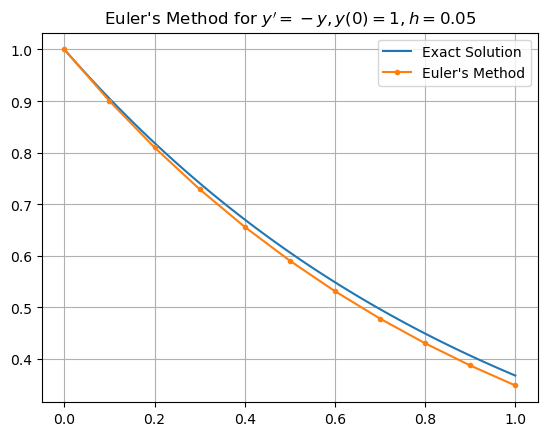

In [7]:
f = lambda t,y: -y

t0 = 0; tf = 1; N = 10; h = (tf - t0)/N;
t = np.linspace(t0,tf,N+1)

y0 = 1
y = np.zeros(len(t))
y[0] = y0

for n in range(N):
    y[n+1] = y[n] + f(t[n],y[n])*h

t_exact = np.linspace(0,1,100)
y_exact = np.exp(-t_exact)

plt.plot(t_exact,y_exact,label='Exact Solution')
plt.plot(t,y,'.-',label="Euler's Method")
plt.grid(True), plt.legend(), plt.title("Euler's Method for $y' = -y, y(0) = 1, h = 0.05$")
plt.show()

## Example

Consider the equation $y' = \cos(t) + \sin(y), y(0)=1$. This is a nonlinear, nonseparable equation and there is no method to solve it analytically using elementary functions. Let's approximate the solution using Euler's method.

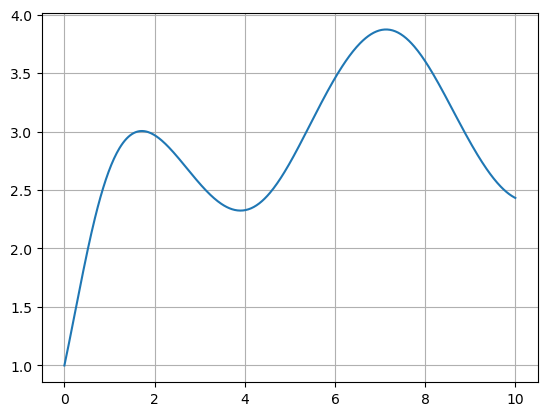

In [9]:
f = lambda t,y: np.cos(t) + np.sin(y)

t0 = 0; tf = 10; N = 500; h = (tf - t0)/N;
t = np.linspace(t0,tf,N+1)

y0 = 1
y = np.zeros(len(t))
y[0] = y0

for n in range(N):
    y[n+1] = y[n] + f(t[n],y[n])*h

plt.plot(t,y)
plt.grid(True)
plt.show()

## Euler's Method Function

Let's define a function called `odeEuler` to implement Euler's method. The function takes input parameters `f`, `t` and `y0` and returns `y` where:

* `f` is a function which represents the right hand side of a first order differential equation $y'=f(t,y)$
* `t` is a vector of $t$ values
* `y0` is the initial value $y_0 = y(t_0)$ where $t_0$ is the first entry `t[0]` of the vector `t`

In [2]:
def odeEuler(f,t,y0):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(len(t)-1):
        y[n+1] = y[n] + f(t[n],y[n])*(t[n+1] - t[n])
    return y

Let's use the function on the same example as above.

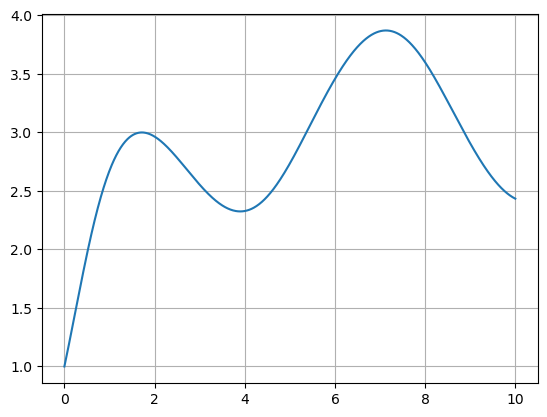

In [3]:
f = lambda t,y: np.cos(t) + np.sin(y)
t0 = 0; tf = 10; N = 1000;
t = np.linspace(t0,tf,N+1)
y0 = 1
y = odeEuler(f,t,y0)
plt.plot(t,y,'C0')
plt.grid(True)
plt.show()

Now let's use the function in a for loop to plot solutions of the example above for many initial conditions.

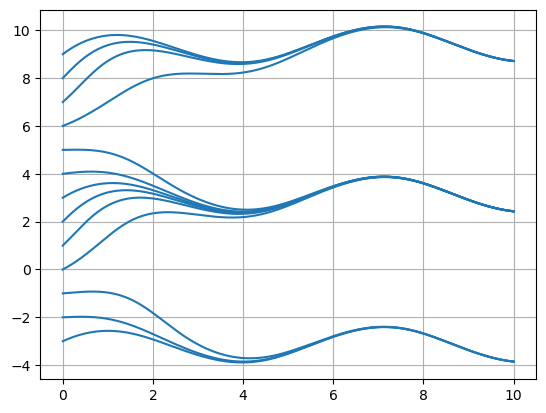

In [4]:
f = lambda t,y: np.cos(t) + np.sin(y)
t0 = 0; tf = 10; N = 500;
t = np.linspace(t0,tf,N+1)

for y0 in range(-3,10):
    y = odeEuler(f,t,y0)
    plt.plot(t,y,'C0')

plt.grid(True)
plt.show()

It seems that solutions converge to oscillating functions at different height depending on the initial condition. 